In [1]:
using CSV, DataFrames, Query, VegaLite

In [2]:
df_census = CSV.File("US_state_ages.csv") |> DataFrame
first(df_census, 2)

,state,0to18,19to25,26to34,35to54,55to64,65plus,total
,String,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,Alabama,0.24,0.09,0.12,0.25,0.14,0.17,4752600
2,Alaska,0.27,0.09,0.13,0.26,0.13,0.12,709100


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


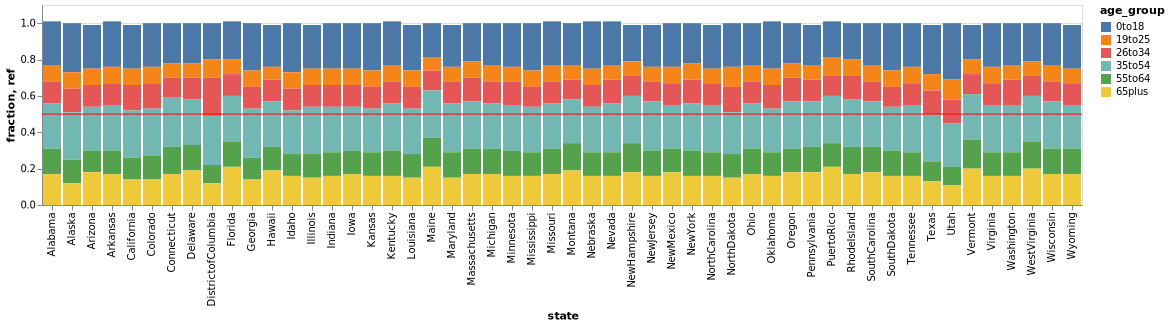

In [9]:
df_single = df_census |> @filter()

stack(df_census, 2:7; variable_name=:age_group, value_name=:fraction, view=false) |> 
@orderby(_.state) |>
@vlplot()+
@vlplot(
    :bar,
    x = :state,
    y = :fraction,
    color = :age_group
) + @vlplot(mark={:rule, color=:red}, data = {values = [{ref = 0.5}]}, y="ref:q")